# Ley de los Grandes Números y Teorema del Límite Central

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Ley de Los Grandes Números

Utilicemos nuevamente el ejemplo del lanzamiento de la moneda, en el primer ejemplo, la moneda va a tener la misma posibilidad de caer en cara o sello.

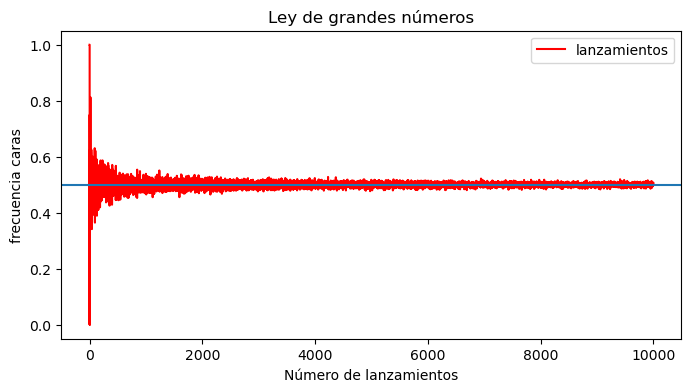

In [4]:
# Ejemplo ley de grandes números
# moneda p=1/2 cara=1 sello=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 4))
plt.axhline(0.5)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

Ahora, vamos a suponer que la moneda está cargada y que caerá cara sólo 1 de 6 veces.

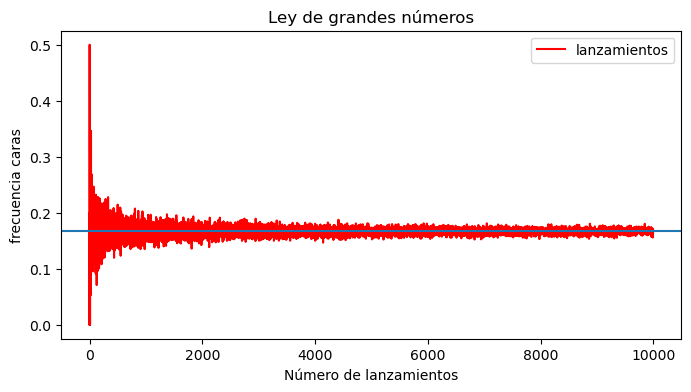

In [5]:

# moneda p=1/6 cara=1 sello=0
resultados = []
for lanzamientos in range(1,10000):
    lanzamientos = np.random.choice([0,1], lanzamientos, p=[5/6, 1/6]) 
    caras = lanzamientos.mean()
    resultados.append(caras)

# graficamente
df = pd.DataFrame({ 'lanzamientos' : resultados})

df.plot(title='Ley de grandes números',color='r',figsize=(8, 4))
plt.axhline(1/6)
plt.xlabel("Número de lanzamientos")
plt.ylabel("frecuencia caras")
plt.show()

### Teorema del Límite Central

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import expon
from scipy.stats import uniform

### Para una distribución exponencial

In [35]:
poblacion_expo = pd.DataFrame()
poblacion_expo['number'] = expon.rvs(10, size = 100000)

<AxesSubplot:>

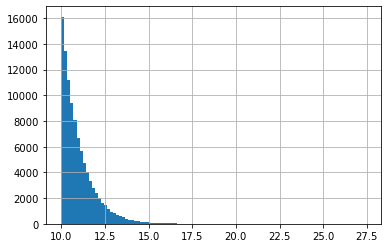

In [36]:
poblacion_expo['number'].hist(bins=100)

In [37]:
muestra_promedio_dis_expo = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_dis_expo.append(poblacion_expo.sample(n=100).mean().values[0])

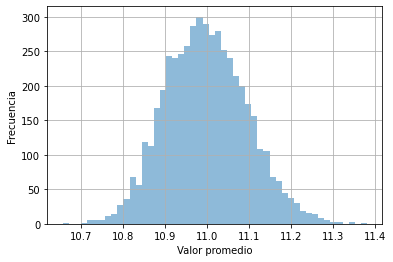

In [38]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

### Para una distribución uniforme

In [39]:
poblacion_uniforme = pd.DataFrame()
poblacion_uniforme['number'] = uniform.rvs(10, size = 100000)

<AxesSubplot:>

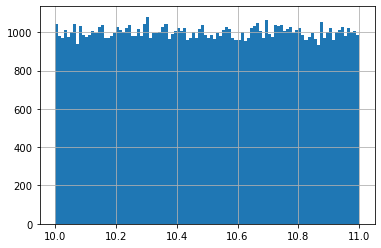

In [40]:
poblacion_uniforme['number'].hist(bins=100)

In [41]:
muestra_promedio_pob_uniforme = []

tamano = 5000

for i in range(0,tamano):
  muestra_promedio_pob_uniforme.append(poblacion_uniforme.sample(n=100).mean().values[0])

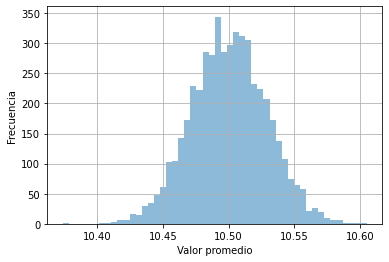

In [42]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()

Comparación:

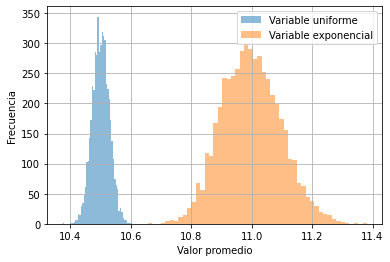

In [43]:
fig, ax = plt.subplots()

ax.hist(muestra_promedio_pob_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(muestra_promedio_dis_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

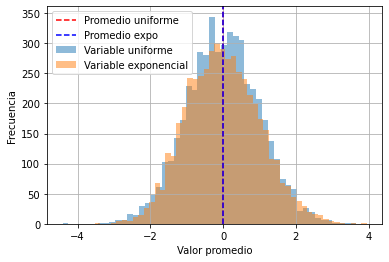

In [44]:
fig, ax = plt.subplots()

# Estandarizacion
z_uniforme = (muestra_promedio_pob_uniforme - np.mean(muestra_promedio_pob_uniforme)) / np.std(muestra_promedio_pob_uniforme)
z_expo = (muestra_promedio_dis_expo - np.mean(muestra_promedio_dis_expo)) / np.std(muestra_promedio_dis_expo)

ax.hist(z_uniforme, bins=50, alpha = 0.5, label='Variable uniforme')
ax.hist(z_expo, bins=50, alpha = 0.5, label='Variable exponencial')

ax.axvline(np.mean(z_uniforme), c='r', linestyle='--', label='Promedio uniforme')
ax.axvline(np.mean(z_expo), c='b', linestyle='--', label='Promedio expo')

ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.legend()
ax.grid()

## Estimadores muestrales

In [45]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vamos a simular que tomamos una muestra de tamaño 1. La muestra tuvo un valor de 3. Al no conocer los parametros poblacionales de la distribucion, vamos a generar una serie de hipotesis.

Supongamos tener dos medias y calculemos la probabilidad de obtener la muestra bajo la hipotesis de los parametros poblacionales (las dos medias).

In [46]:
from scipy.stats import norm

x1 = 3

#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma)


print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

La probabilidad de obtener  3  en una muestra con una media  4  y desviacion de  1  es  0.24197072451914337
La probabilidad de obtener  3  en una muestra con una media  7  y desviacion de  1  es  0.00013383022576488537


Queremos ver la probabilidad conjunta de que ocurran dos casos x1 y x2.

In [47]:
from scipy.stats import norm

x1 = 3
x2 = 10


#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1
p_muestra = norm.pdf(x1, mu1, sigma) * norm.pdf(x2, mu1, sigma)
p_muestra_2 = norm.pdf(x1, mu2, sigma) * norm.pdf(x2, mu2, sigma)

print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu1, ' y desviacion de ', sigma, ' es ', p_muestra)
print('La probabilidad de obtener ', x1, 'y ', x2, ' en una muestra con una media ', mu2, ' y desviacion de ', sigma, ' es ', p_muestra_2)

La probabilidad de obtener  3 y  10  en una muestra con una media  4  y desviacion de  1  es  1.4701857752651781e-09
La probabilidad de obtener  3 y  10  en una muestra con una media  7  y desviacion de  1  es  5.931152735254122e-07


Obtegamos valores aleatorias de la muestra

In [48]:
mu = 5
sigma = 1

muestra_10 = norm.rvs(mu, sigma, size = 10)
muestra_10

array([4.25104243, 4.5734067 , 4.75492101, 5.98752318, 5.68196269,
       2.89342158, 3.88170667, 3.76684209, 6.10806712, 5.13976432])

In [49]:
#medias
mu1 = 4
mu2 = 7
#desviacion estandar
sigma = 1

data_1 = norm.rvs(mu1, sigma, size=100000)
data_2 = norm.rvs(mu2, sigma, size=100000)

In [57]:
muestra_10
y = list([])

for i in range(len(muestra_10)):
  y.append(3000)

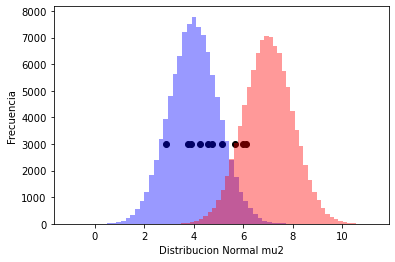

In [58]:
ax = sns.distplot(data_1, bins = 50, color = 'blue', kde = False)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(data_2, bins = 50, color = 'red', kde = False)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

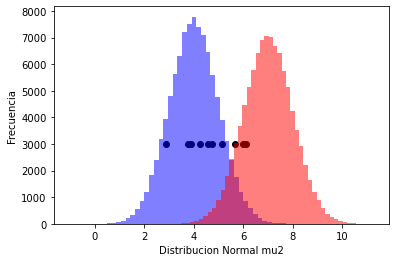

In [56]:
fig, ax = plt.subplots()

ax.hist(data_1, bins = 50, color = 'blue', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu1', ylabel = 'Frecuencia')

ax.hist(data_2, bins = 50, color = 'red', alpha=0.5)
ax.set(xlabel = 'Distribucion Normal mu2', ylabel = 'Frecuencia')

ax.scatter(muestra_10, y, c = 'k')

Con esto podemos ver como la muestra de 10 elementos puede pertencer con mayor probabilidad a una hipotesis respecto a la otra.

La primer hipotesis en la de color azul y la segunda hipotesis de color rojo. Los puntos obtenidos de forma aleatoria fueron graficados todos a una misma altura y podemos observar que se encuentran la mayoria dentro de la primer hipotesis.

## Distribuciones muestrales

In [59]:
import matplotlib.pyplot as plt
from IPython.core.display import Image
import seaborn as sns

%matplotlib inline

# T-student

En probabilidad y estadística, la [distribución t (de Student)](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) es una distribución de probabilidad que surge del problema de estimar la media de una población normalmente distribuida cuando el tamaño de la muestra es pequeño. 

Aparece de manera natural al realizar la prueba t de Student para la determinación de las diferencias entre dos varianzas muestrales y para la construcción del intervalo de confianza para la diferencia entre las partes de dos poblaciones cuando se desconoce la desviación típica de una población y esta debe ser estimada a partir de los datos de una muestra. 

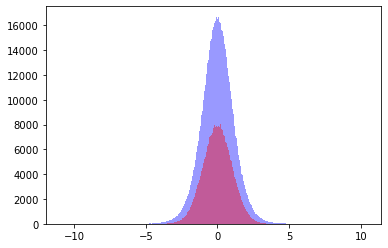

In [60]:
from scipy.stats import t

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = t.rvs(100, size = 1000000)
data2 = t.rvs(10, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

# Chi - cuadrado

La [distribución Chi Cuadrado](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_%CF%87%C2%B2) o de Pearson, ésta es una distribución probabilística continua que se apoya en un parámetro que representa los grados de libertad, la utilidad de este tipo de distribución es que permite determinar la relación entre dos variables, es decir, si existe o no, dependencia estadística entre ellas.

Para poder utilizarla se deben plantear 2 hipotesis. 

Una hipotesis nula y una hipotesis alternativa. Realizando la prueba de chi-cuadrada podemos obtener cual de las hipotesis es mas probabe. Una chi-cuadrada se calcula y la otra se obtiene por [tabla](http://uregina.ca/~gingrich/appchi.pdf).

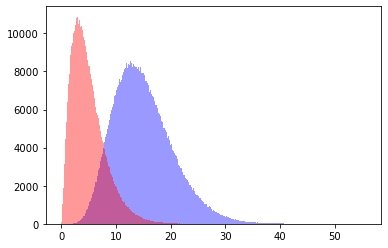

In [61]:
from scipy.stats import chi2

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = chi2.rvs(5, size = 1000000)
data2 = chi2.rvs(15, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

# F Fisher-Snecdecor

La [distribución F de Fisher](https://es.qwe.wiki/wiki/F-distribution) es una distribución que depende de dos parámetros. Se utiliza para evaluar la capacidad explicativa que tiene un grupo de variables independientes sobre la variación de la variable dependiente. Este test es de uso común en inferencia estadística para realizar contrastes de hipótesis.

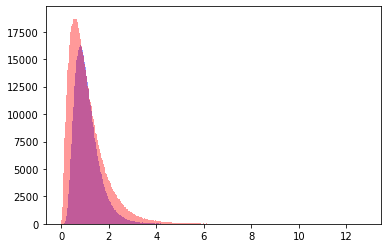

In [62]:
from scipy.stats import f

# Generemos dos muestras aleatorias para verlas graficadas. 
data1 = f.rvs(5, 25, size = 1000000)
data2 = f.rvs(15, 25, size = 1000000)

ax = sns.distplot(data2, bins = 500, kde = False, color = 'blue')
ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')

## Calculo de probabildad

In [63]:
# Calculo de probabilidad
# 15 y 25 son los grados de libertad de muestra x, y
# ¿que probabilidad hay de obtener un 4 en esa distribucion?
f.pdf(4,15,25) 

0.0019800859524222187

In [64]:
# Calculo de probabilidad ACUMULADA

f.cdf(4,15,25) 

0.9988900520089906

In [65]:
# calculo del valor que acumula una determinada probabilidad
f.ppf(0.9988900520089906, 15, 25)

4.000000000000022

In [66]:
# Veamos cual es el valor que acumula el 50%
f.ppf(0.5, 15, 25)

0.982011155699839